In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install tensorflow opencv-python-headless scikit-learn matplotlib numpy pandas
!pip install tifffile pillow rasterio


In [ ]:
import tifffile as tiff
import numpy as np
import os

dataset_path = '/content/drive/My Drive/eurosat/AnnualCrop'
data = []

for img_name in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, img_name)

    try:
        img = tiff.imread(img_path)
        img = np.array(img)
        # Resize if needed (only if you have consistent dimensions)
        if img.shape[0] != 64 or img.shape[1] != 64:
            img = np.resize(img, (64, 64, img.shape[2]))
        data.append(img)
    except Exception as e:
        print(f"Error loading {img_name}: {e}")

data = np.array(data) / 255.0
print("Total images loaded:", len(data))
print("Data shape:", data.shape)


Total images loaded: 3000
Data shape: (3000, 64, 64, 13)


In [ ]:
import rasterio

# Path to the .tif image
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_1.tif'

# Open the image and print metadata
with rasterio.open(file_path) as src:
    print("Metadata:", src.meta)
    print("Tags:", src.tags())
    print("Band Descriptions:", src.descriptions)


Metadata: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 64, 'height': 64, 'count': 13, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 35N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",27],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32635"]]'), 'transform': Affine(10.00570688714736, 0.0, 624602.2348443292,
       0.0, -9.994088099999352, 4877286.033637)}
Tags: {'AREA_OR_POINT': 'Area'}
Band Descriptions: (None, None, None, None, None, None, None, None, None, None, None, None, None)


In [ ]:
import rasterio

# Path to one sample TIFF file
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_1.tif'  # Change this to your file path

with rasterio.open(file_path) as src:
    print("Metadata:", src.meta)
    print("Band Count:", src.count)
    print("\nBand Descriptions:")
    for i in range(1, src.count + 1):
        print(f"Band {i}: {src.descriptions[i-1]}")

    print("\nCRS:", src.crs)
    print("Transform:", src.transform)


Metadata: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 64, 'height': 64, 'count': 13, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 35N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",27],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32635"]]'), 'transform': Affine(10.00570688714736, 0.0, 624602.2348443292,
       0.0, -9.994088099999352, 4877286.033637)}
Band Count: 13

Band Descriptions:
Band 1: None
Band 2: None
Band 3: None
Band 4: None
Band 5: None
Band 6: None
Band 7: None
Band 8: None
Band 9: None
Band 10: 

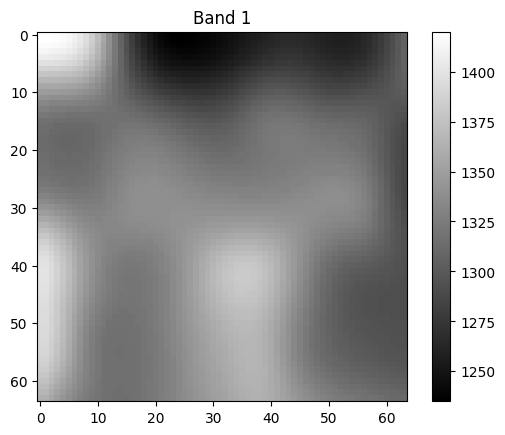

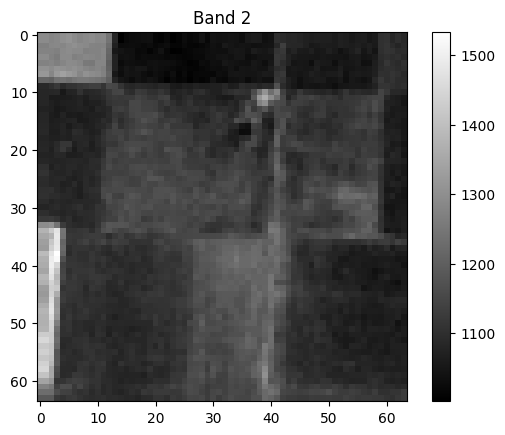

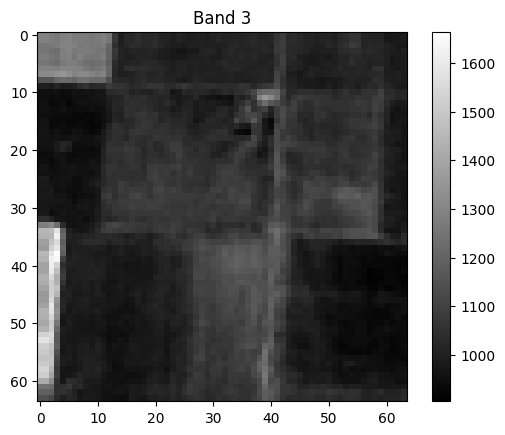

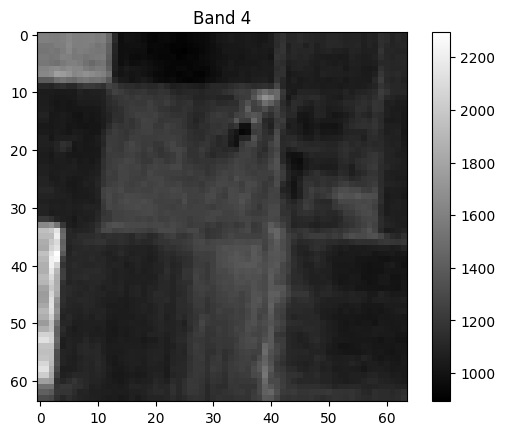

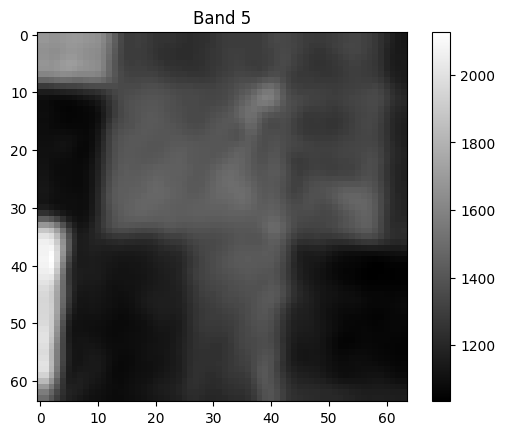

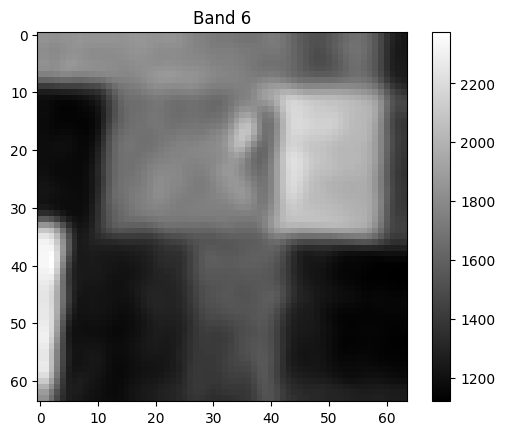

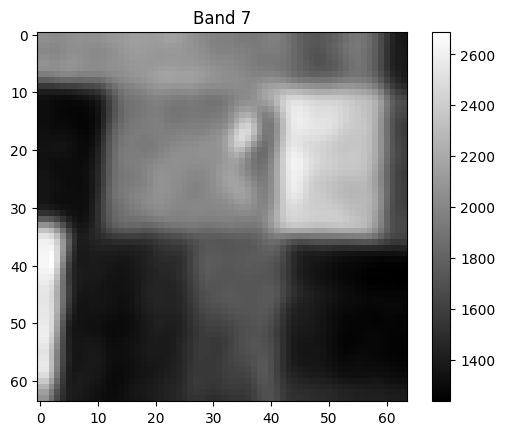

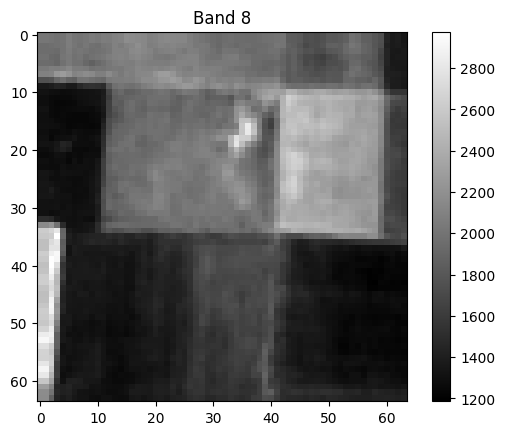

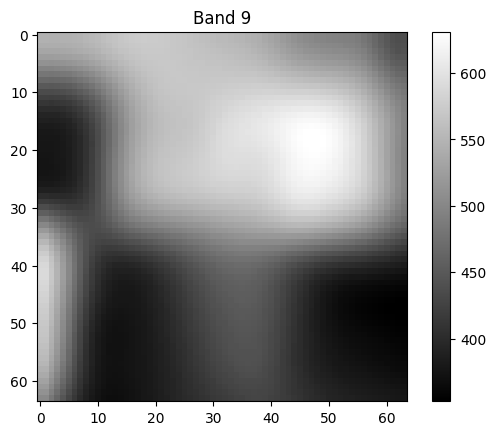

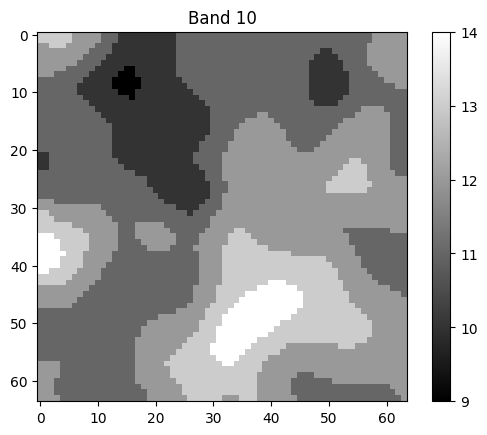

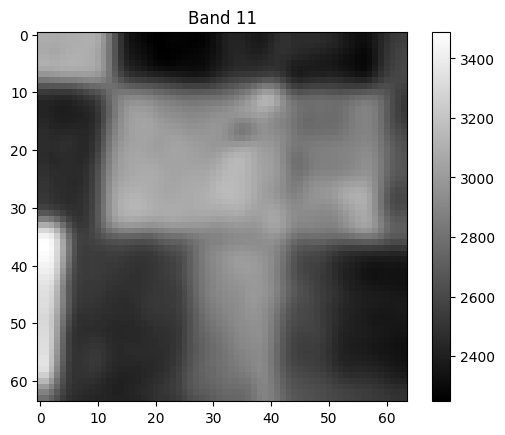

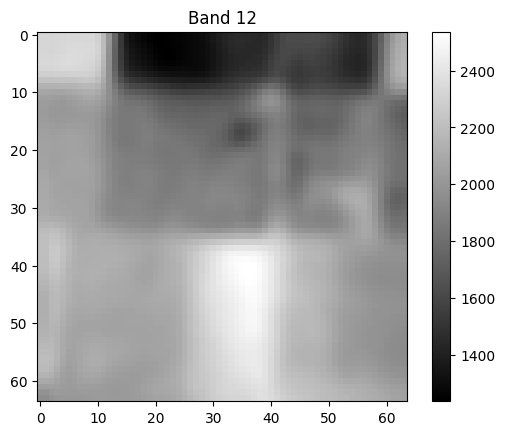

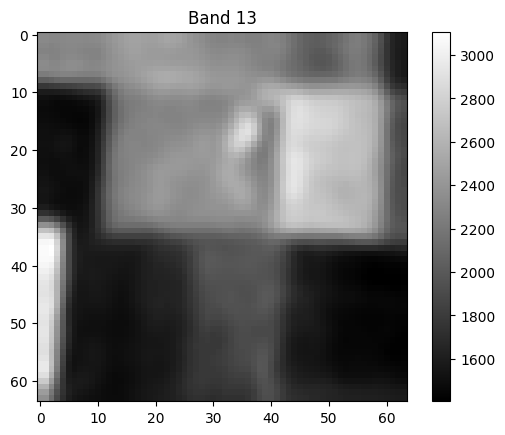

In [ ]:
import rasterio
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_1.tif'  # Update with your file path

with rasterio.open(file_path) as src:
    for i in range(1, src.count + 1):
        band = src.read(i)
        plt.imshow(band, cmap='gray')
        plt.title(f'Band {i}')
        plt.colorbar()
        plt.show()


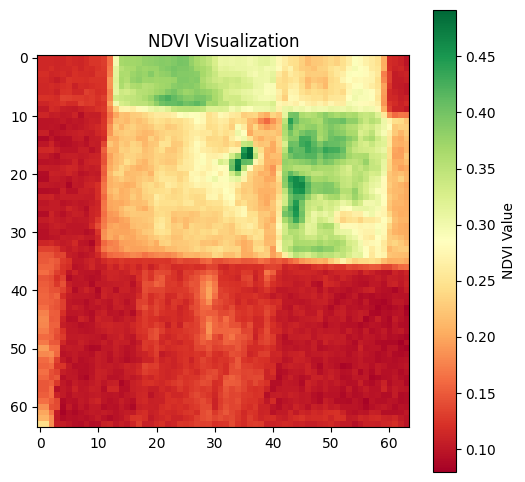

NDVI Min: 0.07971656333037734
NDVI Max: 0.491274457958739


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_1.tif'

def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

with rasterio.open(file_path) as src:
    # Assuming Band 8 is NIR (index 8-1 = 7) and Band 4 is Red (index 4-1 = 3)
    nir = src.read(8).astype(float)
    red = src.read(4).astype(float)

    # Calculate NDVI
    ndvi = calculate_ndvi(nir, red)

    # Display NDVI
    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI Value')
    plt.title('NDVI Visualization')
    plt.show()

    # Print NDVI range
    print("NDVI Min:", np.min(ndvi))
    print("NDVI Max:", np.max(ndvi))


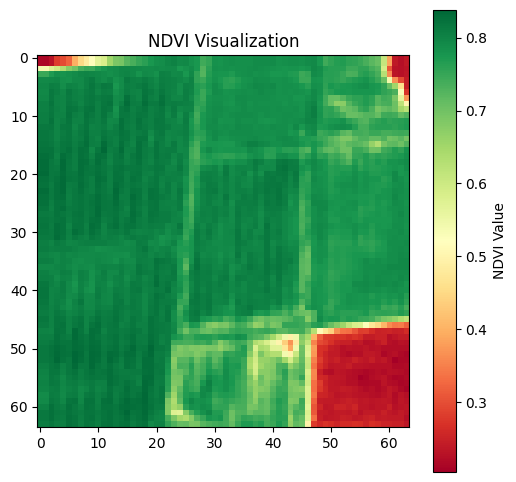

NDVI Min: 0.20399002493764568
NDVI Max: 0.8380642159143593


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_2.tif'

def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

with rasterio.open(file_path) as src:
    # Assuming Band 8 is NIR (index 8-1 = 7) and Band 4 is Red (index 4-1 = 3)
    nir = src.read(8).astype(float)
    red = src.read(4).astype(float)

    # Calculate NDVI
    ndvi = calculate_ndvi(nir, red)

    # Display NDVI
    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI Value')
    plt.title('NDVI Visualization')
    plt.show()

    # Print NDVI range
    print("NDVI Min:", np.min(ndvi))
    print("NDVI Max:", np.max(ndvi))


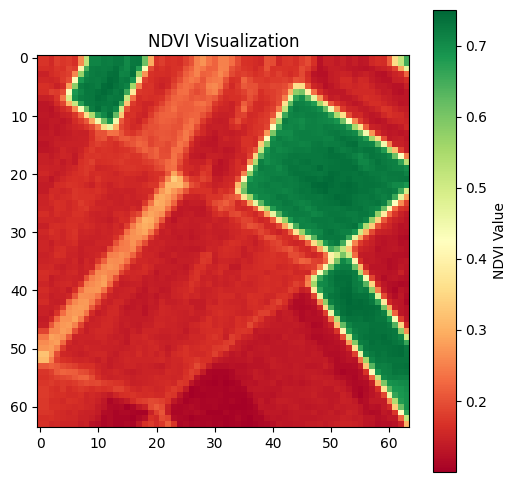

NDVI Min: 0.1000918273645528
NDVI Max: 0.7502412661648186


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_3.tif'

def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

with rasterio.open(file_path) as src:
    # Assuming Band 8 is NIR (index 8-1 = 7) and Band 4 is Red (index 4-1 = 3)
    nir = src.read(8).astype(float)
    red = src.read(4).astype(float)

    # Calculate NDVI
    ndvi = calculate_ndvi(nir, red)

    # Display NDVI
    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI Value')
    plt.title('NDVI Visualization')
    plt.show()

    # Print NDVI range
    print("NDVI Min:", np.min(ndvi))
    print("NDVI Max:", np.max(ndvi))


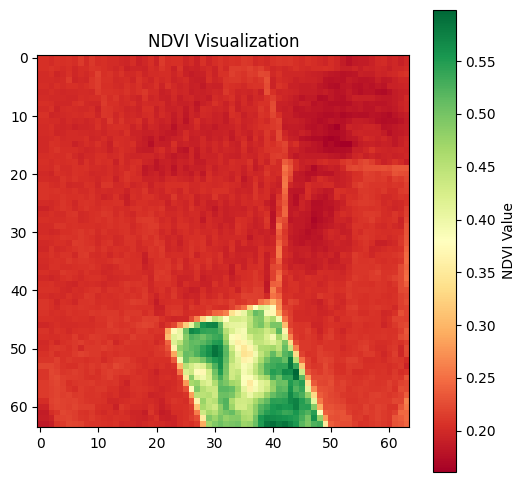

NDVI Min: 0.1609408410548801
NDVI Max: 0.598365025768605


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_4.tif'

def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

with rasterio.open(file_path) as src:
    # Assuming Band 8 is NIR (index 8-1 = 7) and Band 4 is Red (index 4-1 = 3)
    nir = src.read(8).astype(float)
    red = src.read(4).astype(float)

    # Calculate NDVI
    ndvi = calculate_ndvi(nir, red)

    # Display NDVI
    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI Value')
    plt.title('NDVI Visualization')
    plt.show()

    # Print NDVI range
    print("NDVI Min:", np.min(ndvi))
    print("NDVI Max:", np.max(ndvi))


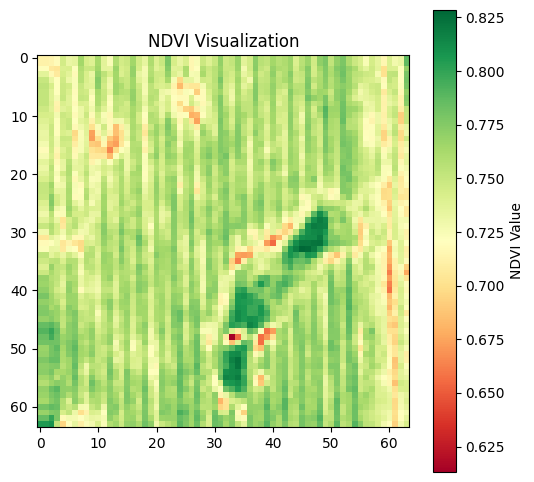

NDVI Min: 0.6131621187800717
NDVI Max: 0.8284873021714975


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_5.tif'

def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

with rasterio.open(file_path) as src:
    # Assuming Band 8 is NIR (index 8-1 = 7) and Band 4 is Red (index 4-1 = 3)
    nir = src.read(8).astype(float)
    red = src.read(4).astype(float)

    # Calculate NDVI
    ndvi = calculate_ndvi(nir, red)

    # Display NDVI
    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI Value')
    plt.title('NDVI Visualization')
    plt.show()

    # Print NDVI range
    print("NDVI Min:", np.min(ndvi))
    print("NDVI Max:", np.max(ndvi))


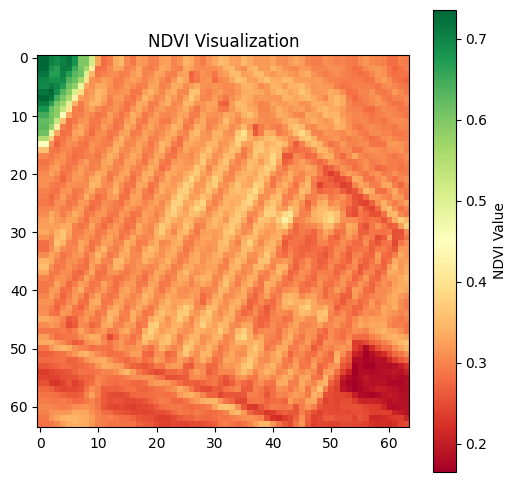

NDVI Min: 0.16522678185744843
NDVI Max: 0.7354396650171158


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_21.tif'

def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

with rasterio.open(file_path) as src:
    # Assuming Band 8 is NIR (index 8-1 = 7) and Band 4 is Red (index 4-1 = 3)
    nir = src.read(8).astype(float)
    red = src.read(4).astype(float)

    # Calculate NDVI
    ndvi = calculate_ndvi(nir, red)

    # Display NDVI
    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI Value')
    plt.title('NDVI Visualization')
    plt.show()

    # Print NDVI range
    print("NDVI Min:", np.min(ndvi))
    print("NDVI Max:", np.max(ndvi))


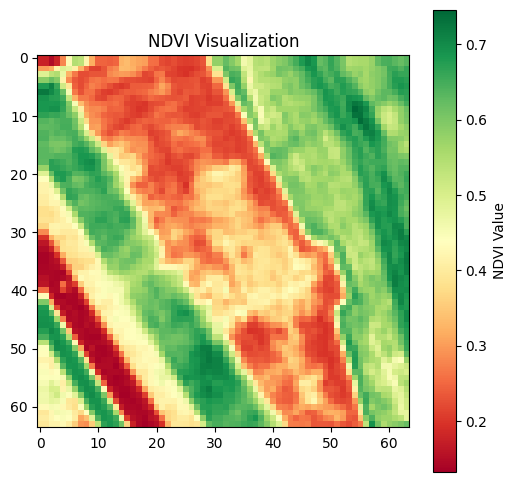

NDVI Min: 0.13298313519490923
NDVI Max: 0.7451340433345438


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_22.tif'

def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

with rasterio.open(file_path) as src:
    # Assuming Band 8 is NIR (index 8-1 = 7) and Band 4 is Red (index 4-1 = 3)
    nir = src.read(8).astype(float)
    red = src.read(4).astype(float)

    # Calculate NDVI
    ndvi = calculate_ndvi(nir, red)

    # Display NDVI
    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI Value')
    plt.title('NDVI Visualization')
    plt.show()

    # Print NDVI range
    print("NDVI Min:", np.min(ndvi))
    print("NDVI Max:", np.max(ndvi))


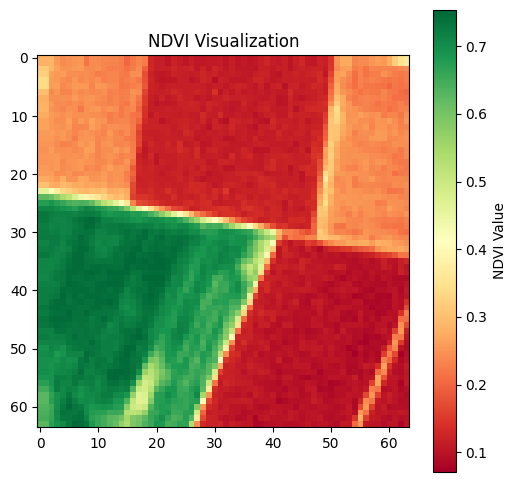

NDVI Min: 0.07096354166666435
NDVI Max: 0.7535035515453877


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_23.tif'

def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

with rasterio.open(file_path) as src:
    # Assuming Band 8 is NIR (index 8-1 = 7) and Band 4 is Red (index 4-1 = 3)
    nir = src.read(8).astype(float)
    red = src.read(4).astype(float)

    # Calculate NDVI
    ndvi = calculate_ndvi(nir, red)

    # Display NDVI
    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI Value')
    plt.title('NDVI Visualization')
    plt.show()

    # Print NDVI range
    print("NDVI Min:", np.min(ndvi))
    print("NDVI Max:", np.max(ndvi))


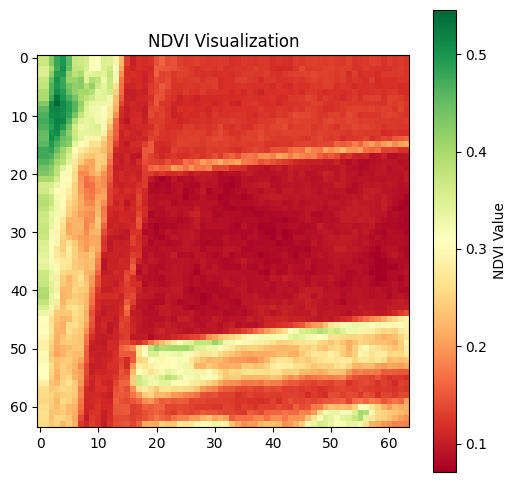

NDVI Min: 0.07090643274853671
NDVI Max: 0.5453149001535978


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_24.tif'

def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

with rasterio.open(file_path) as src:
    # Assuming Band 8 is NIR (index 8-1 = 7) and Band 4 is Red (index 4-1 = 3)
    nir = src.read(8).astype(float)
    red = src.read(4).astype(float)

    # Calculate NDVI
    ndvi = calculate_ndvi(nir, red)

    # Display NDVI
    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI Value')
    plt.title('NDVI Visualization')
    plt.show()

    # Print NDVI range
    print("NDVI Min:", np.min(ndvi))
    print("NDVI Max:", np.max(ndvi))


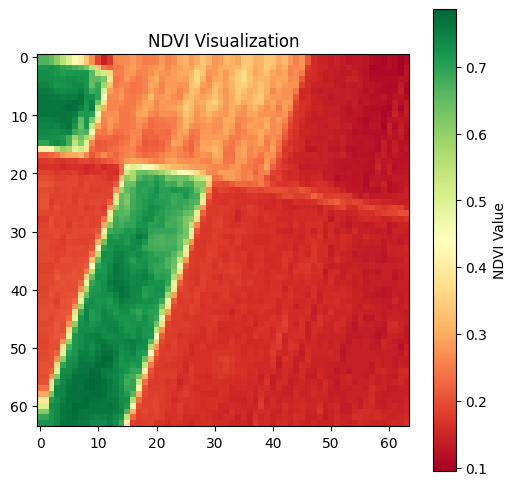

NDVI Min: 0.0943620178041515
NDVI Max: 0.7860019175455266


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_30.tif'

def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

with rasterio.open(file_path) as src:
    # Assuming Band 8 is NIR (index 8-1 = 7) and Band 4 is Red (index 4-1 = 3)
    nir = src.read(8).astype(float)
    red = src.read(4).astype(float)

    # Calculate NDVI
    ndvi = calculate_ndvi(nir, red)

    # Display NDVI
    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI Value')
    plt.title('NDVI Visualization')
    plt.show()

    # Print NDVI range
    print("NDVI Min:", np.min(ndvi))
    print("NDVI Max:", np.max(ndvi))


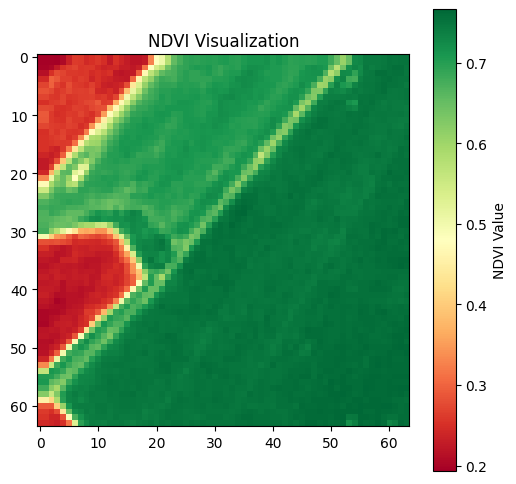

NDVI Min: 0.1930735930735875
NDVI Max: 0.7663092046469892


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the image
file_path = '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_25.tif'

def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red + 1e-10)  # Avoid division by zero

with rasterio.open(file_path) as src:
    # Assuming Band 8 is NIR (index 8-1 = 7) and Band 4 is Red (index 4-1 = 3)
    nir = src.read(8).astype(float)
    red = src.read(4).astype(float)

    # Calculate NDVI
    ndvi = calculate_ndvi(nir, red)

    # Display NDVI
    plt.figure(figsize=(6, 6))
    plt.imshow(ndvi, cmap='RdYlGn')
    plt.colorbar(label='NDVI Value')
    plt.title('NDVI Visualization')
    plt.show()

    # Print NDVI range
    print("NDVI Min:", np.min(ndvi))
    print("NDVI Max:", np.max(ndvi))


In [ ]:
!pip install rasterio numpy matplotlib scikit-learn


In [ ]:
import os

data_dir = '/content/drive/MyDrive/eurosat/AnnualCrop'
tif_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.tif')]

print(f"Total TIFF Files Found: {len(tif_files)}")


Total TIFF Files Found: 3000


In [ ]:
import rasterio
import numpy as np

def calculate_ndvi(file_path, red_band=3, nir_band=7):
    with rasterio.open(file_path) as src:
        red = src.read(red_band + 1).astype(float)
        nir = src.read(nir_band + 1).astype(float)

        # Avoid division by zero
        ndvi = (nir - red) / (nir + red + 1e-10)
        return np.mean(ndvi)


In [ ]:
data = []
labels = []

# Define NDVI threshold (adjust based on data exploration)
ndvi_threshold = 0.4

for file in tif_files:
    try:
        ndvi_value = calculate_ndvi(file)
        data.append([ndvi_value])
        label = 1 if ndvi_value >= ndvi_threshold else 0  # 1 = Healthy, 0 = Stressed
        labels.append(label)
    except Exception as e:
        print(f"Error processing {file}: {e}")

print(f"Processed {len(data)} images.")


Processed 3000 images.


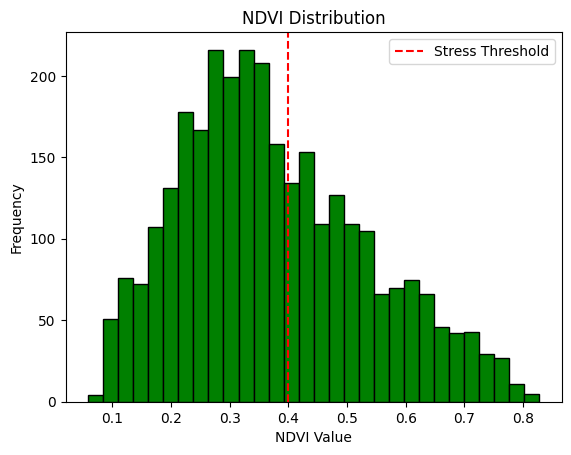

In [ ]:
import matplotlib.pyplot as plt

plt.hist(np.array(data).flatten(), bins=30, color='green', edgecolor='black')
plt.axvline(x=ndvi_threshold, color='red', linestyle='--', label='Stress Threshold')
plt.title('NDVI Distribution')
plt.xlabel('NDVI Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install necessary packages
!pip install tensorflow opencv-python-headless scikit-learn matplotlib numpy pandas tifffile pillow rasterio

# Imports
import os
import tifffile as tiff
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from skimage.feature import graycomatrix, graycoprops
from skimage.util import img_as_ubyte

# Dataset path
data_dir = '/content/drive/MyDrive/eurosat/AnnualCrop'
tif_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.tif')]
print(f"Total TIFF Files Found: {len(tif_files)}")



Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 72.7 MB/s eta 0:00:00
Total TIFF Files Found: 3000


Sample NDVI and texture stats: [{'file': '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_2666.tif', 'mean_ndvi': np.float64(0.5571422627442847), 'var_ndvi': np.float64(0.04058629923313281), 'skewness': np.float64(-0.9857727827250211), 'kurtosis': np.float64(-0.6838139056199548), 'contrast': np.float64(27.022817460317466), 'homogeneity': np.float64(0.4074227694091995), 'entropy': np.float64(8.83030304756308)}, {'file': '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_2100.tif', 'mean_ndvi': np.float64(0.6852783597323031), 'var_ndvi': np.float64(0.010445207355775792), 'skewness': np.float64(0.5781134929824876), 'kurtosis': np.float64(-0.5900729364211226), 'contrast': np.float64(26.017361111111107), 'homogeneity': np.float64(0.5134119888959731), 'entropy': np.float64(7.973885828873633)}, {'file': '/content/drive/MyDrive/eurosat/AnnualCrop/AnnualCrop_750.tif', 'mean_ndvi': np.float64(0.15473558890648131), 'var_ndvi': np.float64(0.0034344584557549707), 'skewness': np.float64(2.51

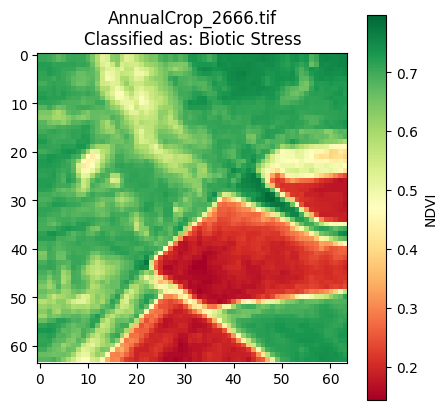

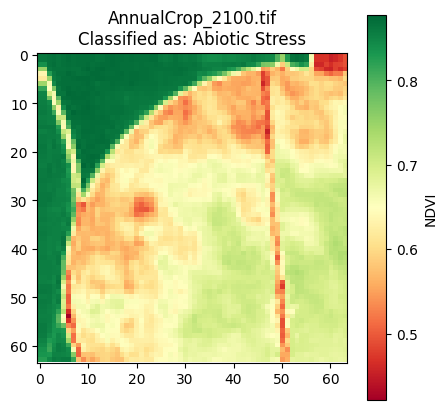

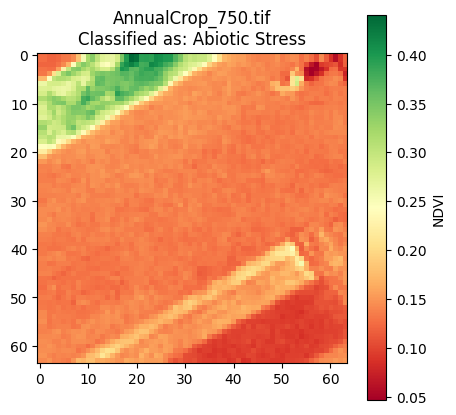

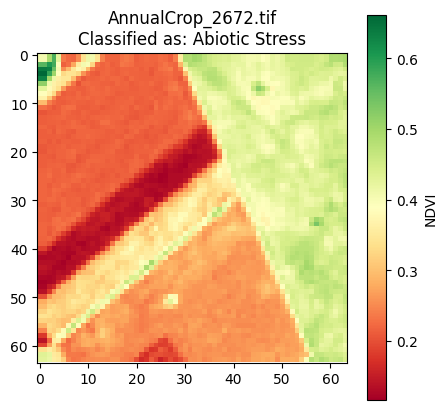

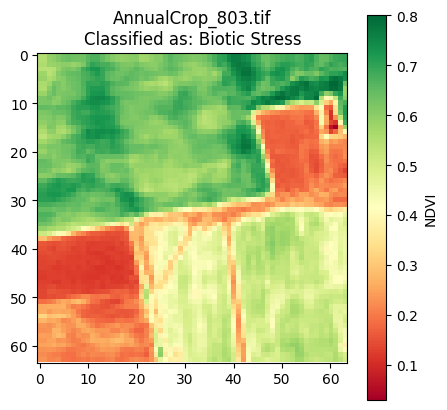

In [3]:
# NDVI calculation function
def calculate_ndvi(file_path, red_band=3, nir_band=7):
    with rasterio.open(file_path) as src:
        red = src.read(red_band + 1).astype(float)
        nir = src.read(nir_band + 1).astype(float)
        ndvi = (nir - red) / (nir + red + 1e-10)
    return ndvi

# Compute NDVI stats and texture features
ndvi_stats = []

for file in tif_files:
    try:
        ndvi_image = calculate_ndvi(file)
        mean_ndvi = np.mean(ndvi_image)
        var_ndvi = np.var(ndvi_image)
        skewness = skew(ndvi_image.flatten())
        kurt_val = kurtosis(ndvi_image.flatten())

        ndvi_uint8 = img_as_ubyte((ndvi_image + 1) / 2)
        glcm = graycomatrix(ndvi_uint8, distances=[1], angles=[0], symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0,0]
        homogeneity = graycoprops(glcm, 'homogeneity')[0,0]
        entropy_val = -np.sum(glcm * np.log2(glcm + 1e-10))

        ndvi_stats.append({
            'file': file,
            'mean_ndvi': mean_ndvi,
            'var_ndvi': var_ndvi,
            'skewness': skewness,
            'kurtosis': kurt_val,
            'contrast': contrast,
            'homogeneity': homogeneity,
            'entropy': entropy_val
        })

    except Exception as e:
        print(f"Error processing {file}: {e}")

print("Sample NDVI and texture stats:", ndvi_stats[:3])

# Simulate Biotic/Abiotic classification based on variance and contrast
classification_results = []

for stats in ndvi_stats:
    var_ndvi = stats['var_ndvi']
    contrast = stats['contrast']
    if var_ndvi < 0.015 and contrast < 30:
        label = 'Abiotic Stress'
    else:
        label = 'Biotic Stress'
    classification_results.append({'file': stats['file'], 'label': label})

print("Sample classifications:", classification_results[:5])

# Visualize NDVI maps with classification labels
for idx, result in enumerate(classification_results[:5]):
    ndvi_image = calculate_ndvi(result['file'])
    label = result['label']
    plt.figure(figsize=(5, 5))
    plt.imshow(ndvi_image, cmap='RdYlGn')
    plt.title(f"{os.path.basename(result['file'])}\nClassified as: {label}")
    plt.colorbar(label="NDVI")
    plt.show()


Mounted at /content/drive
Total images loaded: 3000


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 1)           │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 297,473 (1.13 MB)

 Trainable params: 296,705 (1.13 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.9069 - loss: 0.2008 - val_accuracy: 0.6138 - val_loss: 0.5560
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9731 - loss: 0.0661 - val_accuracy: 0.6126 - val_loss: 0.5457
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9794 - loss: 0.0503 - val_accuracy: 0.8270 - val_loss: 0.3761
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.9781 - loss: 0.0524 - val_accuracy: 0.8465 - val_loss: 0.3210
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9799 - loss: 0.0486 - val_accuracy: 0.8403 - val_loss: 0.3300
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9743 - loss: 0.0619 - val_accuracy: 0.9437 - val_loss: 0.1545
Epoch 7/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.9761 - loss: 0.0576 - val_accuracy: 0.9523 - val_loss: 0.1212
Epoch 8/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.9802 - loss: 0.0474 - val_accuracy: 0.9696 - v

Test Accuracy: 0.9902697801589966
Model saved successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


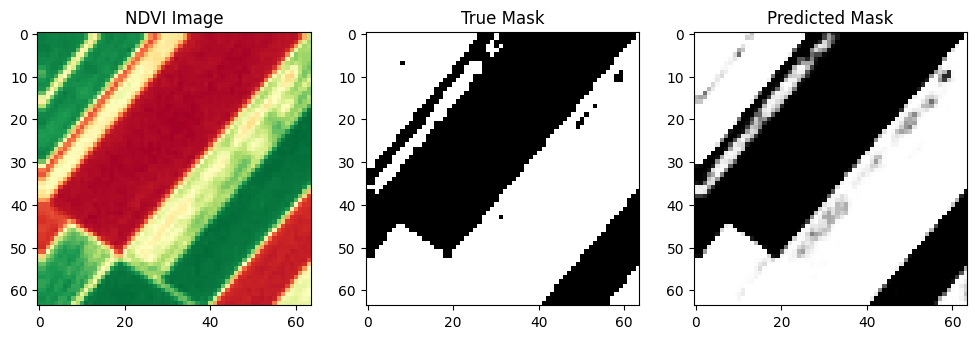

In [ ]:
from google.colab import drive
import os
import numpy as np
import tifffile as tiff
import rasterio
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Mount Google Drive
drive.mount('/content/drive')

# Paths and Parameters
dataset_path = '/content/drive/MyDrive/eurosat/AnnualCrop'
ndvi_threshold = 0.4
img_size = (64, 64)

# NDVI Calculation
def calculate_ndvi(file_path, red_band=3, nir_band=7):
    with rasterio.open(file_path) as src:
        red = src.read(red_band + 1).astype(float)
        nir = src.read(nir_band + 1).astype(float)
        ndvi = (nir - red) / (nir + red + 1e-10)
        return ndvi

# Data Loading
def load_data(dataset_path):
    X, Y = [], []
    for img_name in os.listdir(dataset_path):
        img_path = os.path.join(dataset_path, img_name)
        try:
            ndvi = calculate_ndvi(img_path)
            if ndvi.shape != img_size:
                ndvi = np.resize(ndvi, img_size)

            # Create binary mask based on NDVI threshold
            mask = (ndvi >= ndvi_threshold).astype(np.uint8)
            X.append(ndvi)
            Y.append(mask)
        except Exception as e:
            print(f"Error processing {img_name}: {e}")
    return np.array(X).reshape(-1, 64, 64, 1), np.array(Y).reshape(-1, 64, 64, 1)

X, Y = load_data(dataset_path)
print("Total images loaded:", X.shape[0])

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# SegNet Model
def build_segnet(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Decoder
    x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_segnet((64, 64, 1))
model.summary()

# Train the model
history = model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)

# Save the model
model.save('/content/drive/MyDrive/crop_segnet_model.h5')
print("Model saved successfully.")

# Visualize predictions
def visualize_sample(X, Y, model):
    sample_idx = np.random.randint(0, X.shape[0])
    sample_img = X[sample_idx]
    sample_mask = Y[sample_idx]

    pred_mask = model.predict(sample_img[np.newaxis, ...])[0]

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.title("NDVI Image")
    plt.imshow(sample_img.squeeze(), cmap='RdYlGn')

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(sample_mask.squeeze(), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(pred_mask.squeeze(), cmap='gray')

    plt.show()

visualize_sample(X_test, Y_test, model)


In [ ]:
from google.colab import drive
import os
import numpy as np
import tifffile as tiff
import rasterio
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import cv2

# Mount Google Drive
drive.mount('/content/drive')

# Paths and Parameters
dataset_path = '/content/drive/MyDrive/eurosat/AnnualCrop'
ndvi_threshold = 0.4
img_size = (64, 64)

# NDVI Calculation
def calculate_ndvi(file_path, red_band=3, nir_band=7):
    with rasterio.open(file_path) as src:
        if src.count < max(red_band, nir_band) + 1:
            raise ValueError("Insufficient bands in image")

        red = src.read(red_band + 1).astype(float)
        nir = src.read(nir_band + 1).astype(float)
        ndvi = (nir - red) / (nir + red + 1e-10)
        return ndvi

# Data Loading
def load_data(dataset_path):
    X, Y = [], []
    for img_name in os.listdir(dataset_path):
        img_path = os.path.join(dataset_path, img_name)
        try:
            ndvi = calculate_ndvi(img_path)
            ndvi_resized = cv2.resize(ndvi, img_size, interpolation=cv2.INTER_AREA)

            mask = (ndvi_resized >= ndvi_threshold).astype(np.uint8)

            X.append(ndvi_resized)
            Y.append(mask)
        except Exception as e:
            print(f"Error processing {img_name}: {e}")

    return np.array(X).reshape(-1, img_size[0], img_size[1], 1), np.array(Y).reshape(-1, img_size[0], img_size[1], 1)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Total images loaded: 3000


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 64, 64, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 32, 32, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,332,225 (5.08 MB)

 Trainable params: 1,330,433 (5.08 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.8941 - loss: 0.2447 - val_accuracy: 0.6541 - val_loss: 0.5086
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9605 - loss: 0.0935 - val_accuracy: 0.6346 - val_loss: 0.4966
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.9616 - loss: 0.0889 - val_accuracy: 0.6280 - val_loss: 0.7883
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9564 - loss: 0.1062 - val_accuracy: 0.7745 - val_loss: 0.6805
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.9659 - loss: 0.0809 - val_accuracy: 0.8293 - val_loss: 0.4194
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9664 - loss: 0.0781 - val_accuracy: 0.9185 - val_loss: 0.1765
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9719 - loss: 0.0674 - val_accuracy: 0.9513 - val_loss: 0.1102
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.9726 - loss: 0.0654 - val_accuracy: 0.9576 - v

Test Accuracy: 0.97641521692276
Model saved successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


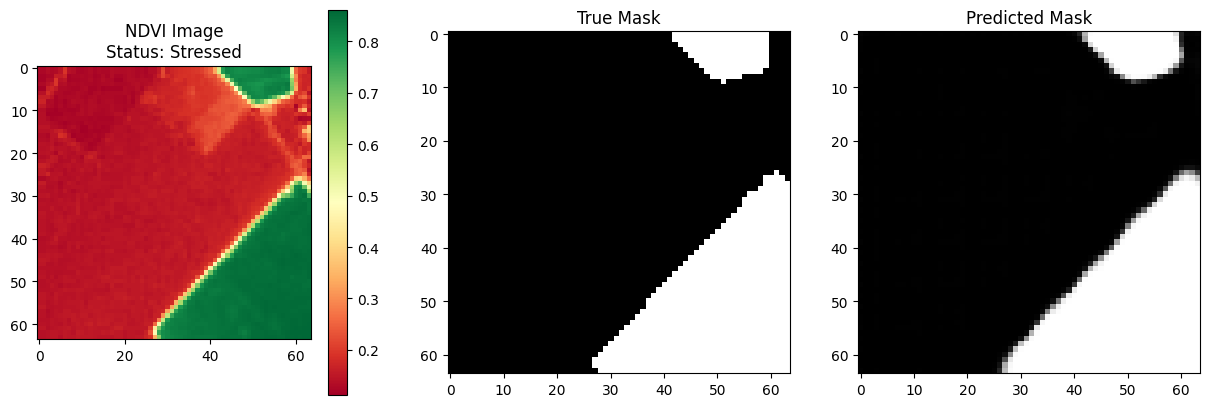

In [ ]:
X, Y = load_data(dataset_path)
print("Total images loaded:", X.shape[0])

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Enhanced SegNet Model
def build_segnet(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Decoder
    x = layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_segnet((64, 64, 1))
model.summary()

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Accuracy:", test_acc)

# Save the model
model.save('/content/drive/MyDrive/crop_segnet_model_1.h5')
print("Model saved successfully.")

# Improved Visualization
def visualize_sample(X, Y, model, ndvi_threshold=0.4):
    sample_idx = np.random.randint(0, X.shape[0])
    sample_img = X[sample_idx]
    sample_mask = Y[sample_idx]

    pred_mask = model.predict(sample_img[np.newaxis, ...])[0]

    mean_ndvi = np.mean(sample_img)
    crop_status = "Healthy" if mean_ndvi >= ndvi_threshold else "Stressed"

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.title(f"NDVI Image\nStatus: {crop_status}")
    ndvi_plot = plt.imshow(sample_img.squeeze(), cmap='RdYlGn')
    plt.colorbar(ndvi_plot)

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(sample_mask.squeeze(), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(pred_mask.squeeze(), cmap='gray')

    plt.show()

visualize_sample(X_test, Y_test, model)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, jaccard_score, roc_auc_score
import cv2
# Quantitative Metrics
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

y_true_flat = Y_test.flatten()
y_pred_flat = y_pred_binary.flatten()

accuracy = accuracy_score(y_true_flat, y_pred_flat)
precision = precision_score(y_true_flat, y_pred_flat)
recall = recall_score(y_true_flat, y_pred_flat)
f1 = f1_score(y_true_flat, y_pred_flat)
jaccard = jaccard_score(y_true_flat, y_pred_flat)
roc_auc = roc_auc_score(y_true_flat, y_pred_flat)
conf_matrix = confusion_matrix(y_true_flat, y_pred_flat)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Jaccard Index (IoU): {jaccard:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("Confusion Matrix:\n", conf_matrix)

19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 775ms/step
Accuracy: 0.9764
Precision: 0.9866
Recall: 0.9563
F1 Score: 0.9712
Jaccard Index (IoU): 0.9441
ROC-AUC: 0.9735
Confusion Matrix:
 [[1420690   13254]
 [  44708  978948]]


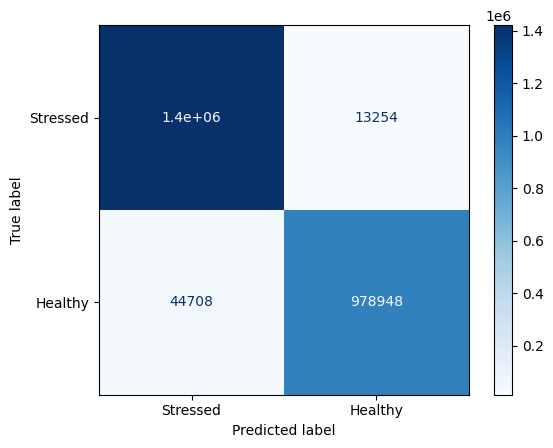

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Stressed', 'Healthy'])
disp.plot(cmap='Blues')
plt.show()

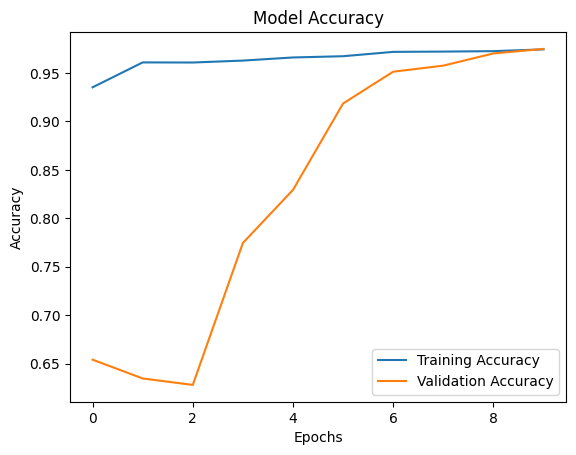

In [ ]:
# Accuracy Graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()